In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [2]:
#loading data

#loading police data
dv_police_df = pd.read_csv('DV_Data_NP.csv')

#loading football data
fb_world_cup_df = pd.read_csv('FootballData_WorldCup.csv')
fb_premier_df = pd.read_csv('FootballData_PremierLeague.csv')
fb_championship_df = pd.read_csv('FootballData_Championship.csv')
fb_fa_cup_df = pd.read_csv('FootballData_FACup.csv')
fb_euro_df = pd.read_csv('FootballData_Euro.csv')

#cleaning and dropping NAs from dataframe
dv_police_df_cleaned = dv_police_df.dropna()
fb_world_cup_df_cleaned = fb_world_cup_df.dropna()
fb_premier_df_cleaned = fb_premier_df.dropna()
fb_championship_df_cleaned = fb_championship_df.dropna()
fb_fa_cup_df_cleaned = fb_fa_cup_df.dropna()
fb_euro_df_cleaned = fb_euro_df.dropna()

#grouping police data by year and location, dropping month columns
dv_police_df_cleaned_aggregated = dv_police_df_cleaned.groupby(['Year', 'Location']).sum().reset_index().drop(columns=['Month'])

#aggregated police data, separated by location
df_police_newcastle = dv_police_df_cleaned_aggregated[dv_police_df_cleaned_aggregated["Location"] == "Newcastle"]
df_police_gateshead = dv_police_df_cleaned_aggregated[dv_police_df_cleaned_aggregated["Location"] == "Gateshead"]
df_police_n_tyneside = dv_police_df_cleaned_aggregated[dv_police_df_cleaned_aggregated["Location"] == "North Tyneside"]
df_police_s_tyneside = dv_police_df_cleaned_aggregated[dv_police_df_cleaned_aggregated["Location"] == "South Tyneside"]
df_police_sunderland = dv_police_df_cleaned_aggregated[dv_police_df_cleaned_aggregated["Location"] == "Sunderland"]
df_police_northumberland = dv_police_df_cleaned_aggregated[dv_police_df_cleaned_aggregated["Location"] == "Northumberland"]

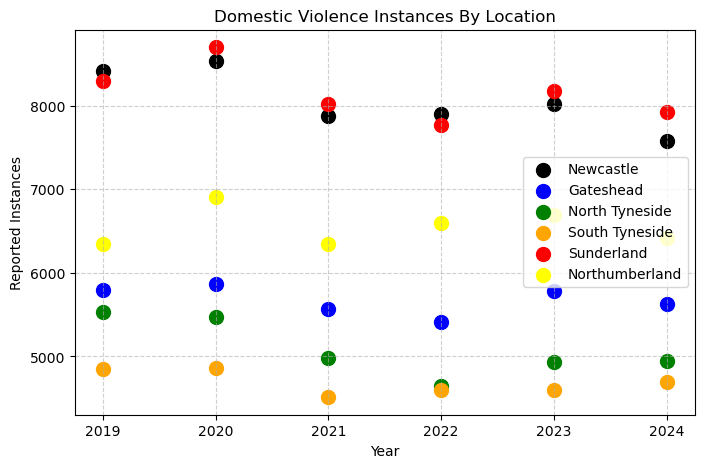

In [3]:
#plotting domestic violence instances per year per location into a scatter graph
plt.figure(figsize=(8, 5))
plt.scatter(df_police_newcastle['Year'], df_police_newcastle['ReportedInstances'], marker='o', color='black', s=100, label='Newcastle')
plt.scatter(df_police_gateshead['Year'], df_police_gateshead['ReportedInstances'], marker='o', color='blue', s=100, label='Gateshead')
plt.scatter(df_police_n_tyneside['Year'], df_police_n_tyneside['ReportedInstances'], marker='o', color='green', s=100, label='North Tyneside')
plt.scatter(df_police_s_tyneside['Year'], df_police_s_tyneside['ReportedInstances'], marker='o', color='orange', s=100, label='South Tyneside')
plt.scatter(df_police_sunderland['Year'], df_police_sunderland['ReportedInstances'], marker='o', color='red', s=100, label='Sunderland')
plt.scatter(df_police_northumberland['Year'], df_police_northumberland['ReportedInstances'], marker='o', color='yellow', s=100, label='Northumberland')

#adding titles and labels
plt.title('Domestic Violence Instances By Location')
plt.xlabel('Year')
plt.ylabel('Reported Instances')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

#displaying the plot
plt.show()

In [4]:
#grouping football dataframe by season, winner and then sorting by the date of match for all football dataframes

#World Cup
fb_world_cup_group_df = fb_world_cup_df_cleaned.groupby(["Season", "Winner"]).count().reset_index()
fb_world_cup_sorted_df = fb_world_cup_group_df.sort_values(by="DateofMatch", ascending=False)
fb_world_cup_sorted_df = fb_world_cup_sorted_df[fb_world_cup_sorted_df['Winner'] != "Draw"]

#Premier Cup
fb_premier_group_df = fb_premier_df_cleaned.groupby(["Season", "Winner"]).count().reset_index()
fb_premier_sorted_df = fb_premier_group_df.sort_values(by="DateofMatch", ascending=False)
fb_premier_sorted_df = fb_premier_sorted_df[fb_premier_sorted_df['Winner'] != "Draw"]

#Championship
fb_championship_group_df = fb_championship_df_cleaned.groupby(["Season", "Winner"]).count().reset_index()
fb_championship_sorted_df = fb_championship_group_df.sort_values(by="DateofMatch", ascending=False)
fb_championship_sorted_df = fb_championship_sorted_df[fb_championship_sorted_df['Winner'] != "Draw"]

#FA Cup
fb_fa_cup_df_group_df = fb_fa_cup_df_cleaned.groupby(["Season", "Winner"]).count().reset_index()
fb_fa_cup_df_sorted_df = fb_fa_cup_df_group_df.sort_values(by="DateofMatch", ascending=False)
fb_fa_cup_df_top30_df = fb_fa_cup_df_sorted_df.nlargest(30, "DateofMatch")
fb_fa_cup_df_top30_df = fb_fa_cup_df_top30_df[fb_fa_cup_df_top30_df['Winner'] != "Draw"]

#Euros
fb_euro_group_df = fb_euro_df_cleaned.groupby(["Season", "Winner"]).count().reset_index()
fb_euro_sorted_df = fb_euro_group_df.sort_values(by="DateofMatch", ascending=False)
fb_euro_sorted_df = fb_euro_sorted_df[fb_euro_sorted_df['Winner'] != "Draw"]

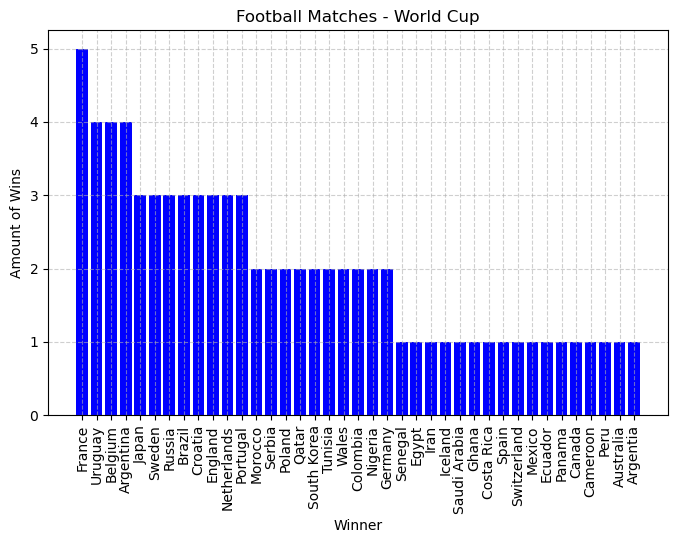

In [5]:
#bar chart showing Wins per team during the World Cup in the years 2018 and 2022
plt.figure(figsize=(8, 5))
plt.bar(fb_world_cup_sorted_df['Winner'], fb_world_cup_sorted_df['DateofMatch'], color=['blue'])

#adding titles and labels
plt.title('Football Matches - World Cup')
plt.xlabel('Winner')
plt.ylabel('Amount of Wins')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)

#displaying the plot
plt.show()

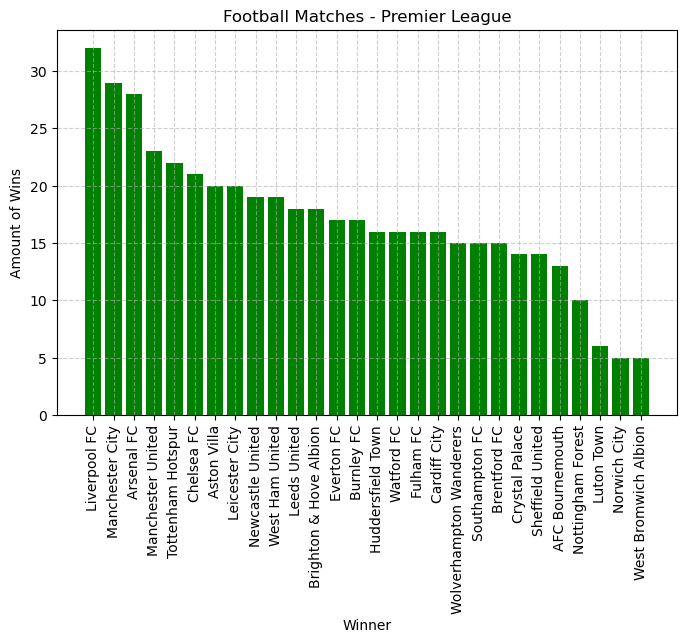

In [6]:
#bar chart showing Wins per team in the Premier League between 2018-2024
plt.figure(figsize=(8, 5))
plt.bar(fb_premier_sorted_df['Winner'], fb_premier_sorted_df['DateofMatch'], color=['green'])

#adding titles and labels
plt.title('Football Matches - Premier League')
plt.xlabel('Winner')
plt.ylabel('Amount of Wins')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)

#displaying the plot
plt.show()

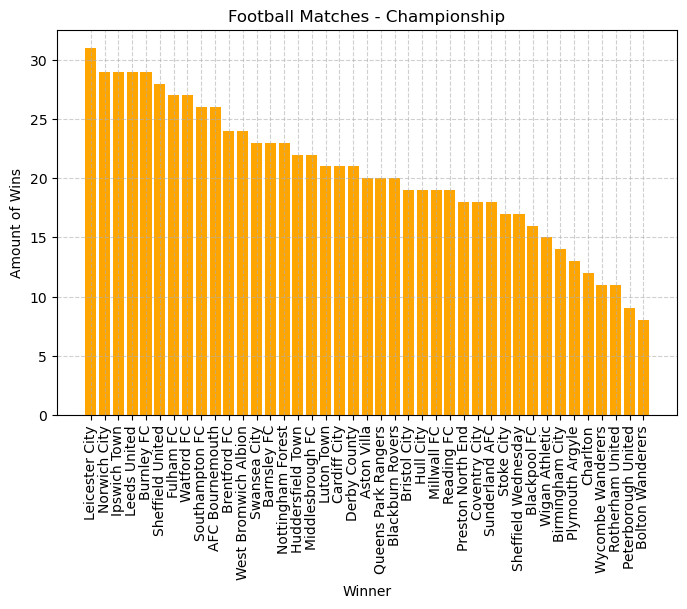

In [7]:
#bar chart showing Wins per team in the Championship between 2018-2024
plt.figure(figsize=(8, 5))
plt.bar(fb_championship_sorted_df['Winner'], fb_championship_sorted_df['DateofMatch'], color=['orange'])

#adding titles and labels
plt.title('Football Matches - Championship')
plt.xlabel('Winner')
plt.ylabel('Amount of Wins')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)

#displaying the plot
plt.show()

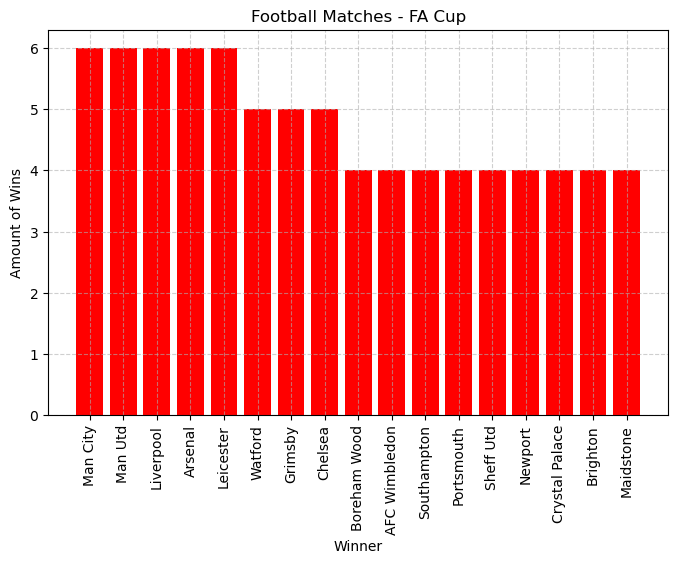

In [8]:
#bar chart showing Wins per team in the FA Cup between 2018-2024
plt.figure(figsize=(8, 5))
plt.bar(fb_fa_cup_df_top30_df['Winner'], fb_fa_cup_df_top30_df['DateofMatch'], color=['red'])

#adding titles and labels
plt.title('Football Matches - FA Cup')
plt.xlabel('Winner')
plt.ylabel('Amount of Wins')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)

#displaying the plot
plt.show()

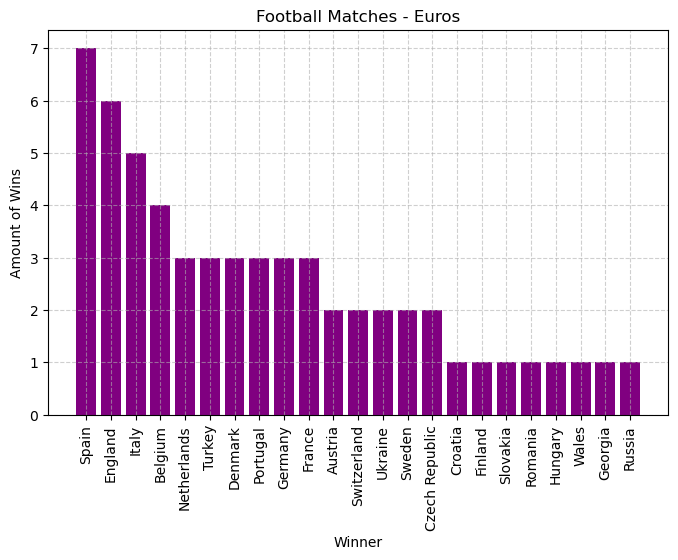

In [9]:
#bar chart showing Wins per team in the Euros between 2018-2024
plt.figure(figsize=(8, 5))
plt.bar(fb_euro_sorted_df['Winner'], fb_euro_sorted_df['DateofMatch'], color=['purple'])

#adding titles and labels
plt.title('Football Matches - Euros')
plt.xlabel('Winner')
plt.ylabel('Amount of Wins')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)

#displaying the plot
plt.show()

In [10]:
#Filtering premier league dataframe to Newcastle United games
fb_premier_df_filtered = fb_premier_df_cleaned[(fb_premier_df_cleaned['HomeTeam'] == "Newcastle United") | (fb_premier_df_cleaned['AwayTeam'] == "Newcastle United")].reset_index()
fb_premier_df_filtered.head()

,index,Season,DateofMatch,HomeTeam,AwayTeam,HomeTeamScore,AwayTeamScore,Winner,Location,Derby
0,6,2018/2019,11/08/2018,Newcastle United,Tottenham Hotspur,1,2,Newcastle United,Newcastle Upon Tyne,False
1,12,2018/2019,16/03/2019,AFC Bournemouth,Newcastle United,2,2,Draw,Bournemouth,False
2,27,2018/2019,26/08/2018,Newcastle United,Chelsea FC,1,2,Newcastle United,Newcastle Upon Tyne,False
3,34,2018/2019,01/09/2018,Manchester City,Newcastle United,2,1,Manchester City,Manchester,False
4,53,2018/2019,22/09/2018,Crystal Palace,Newcastle United,0,0,Draw,London,False


In [11]:
#transforming Date of Match to correct format and grouping by Year, Month
fb_premier_df_filtered['DateofMatch'].astype(str)
fb_premier_df_filtered['DateofMatch'] = pd.to_datetime(fb_premier_df_filtered['DateofMatch'], format='%d/%m/%Y')
fb_premier_df_filtered['MonthNumber'] = fb_premier_df_filtered['DateofMatch'].dt.month
fb_premier_df_filtered['Year'] = fb_premier_df_filtered['DateofMatch'].dt.year
fb_premier_df_filtered['Month'] = fb_premier_df_filtered['DateofMatch'].dt.month_name()
fb_premier_df_filtered = fb_premier_df_filtered.groupby(['Year','Month']).size().reset_index(name='NoOfMatches')

#filling empty datapoints with 0s
zero_matches = [
    {"Year": 2019, "Month": "May", "NoOfMatches": 0},
    {"Year": 2019, "Month": "July", "NoOfMatches": 0},
    {"Year": 2020, "Month": "April", "NoOfMatches": 0},
    {"Year": 2020, "Month": "May", "NoOfMatches": 0},
    {"Year": 2020, "Month": "August", "NoOfMatches": 0},
    {"Year": 2021, "Month": "June", "NoOfMatches": 0},
    {"Year": 2021, "Month": "July", "NoOfMatches": 0},
    {"Year": 2021, "Month": "September", "NoOfMatches": 0},
    {"Year": 2022, "Month": "June", "NoOfMatches": 0},
    {"Year": 2022, "Month": "July", "NoOfMatches": 0},
    {"Year": 2023, "Month": "June", "NoOfMatches": 0},
    {"Year": 2023, "Month": "July", "NoOfMatches": 0},
    {"Year": 2024, "Month": "June", "NoOfMatches": 0},
    {"Year": 2024, "Month": "July", "NoOfMatches": 0},
]

zero_matches_df = pd.DataFrame(zero_matches)

#joining the two dataframes together
fb_premier_df_filtered = pd.concat([fb_premier_df_filtered, zero_matches_df], ignore_index=True)
fb_premier_df_filtered.head(65)

,Year,Month,NoOfMatches
0,2018,August,3
1,2018,December,7
2,2018,November,3
3,2018,October,3
4,2018,September,4
...,...,...,...
60,2019,July,0
61,2020,April,0
62,2020,May,0
63,2020,August,0


In [12]:
#filtering police dataframe to Newcastle
dv_police_df_filtered_newcastle = dv_police_df_cleaned[(dv_police_df_cleaned["Location"] == "Newcastle")].reset_index()
dv_police_df_newcastle_group_by_month = dv_police_df_filtered_newcastle.groupby(['Year', 'Month'])['ReportedInstances'].sum().reset_index()
dv_police_df_newcastle_group_by_month.head(24)

,Year,Month,ReportedInstances
0,2019,April,707
1,2019,August,728
2,2019,December,726
3,2019,February,681
4,2019,January,765
5,2019,July,759
6,2019,June,719
7,2019,March,751
8,2019,May,699
9,2019,November,639


In [13]:
#combing dataset and then setting the month order, before sorting by year and month
dv_premier_combined_df = pd.merge(fb_premier_df_filtered, dv_police_df_newcastle_group_by_month, on=['Year', 'Month'], how="inner")

#setting month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

#setting month column as categorical with ordered categories
dv_premier_combined_df['Month'] = pd.Categorical(dv_premier_combined_df['Month'], categories=month_order, ordered=True)

#sorting dataframe by year and month
dv_premier_combined_sorted_df = dv_premier_combined_df.sort_values(by=['Year','Month'])
dv_premier_combined_sorted_df.head(80)

,Year,Month,NoOfMatches,ReportedInstances
4,2019,January,3,765
3,2019,February,5,681
6,2019,March,1,751
0,2019,April,2,707
54,2019,May,0,699
...,...,...,...,...
52,2024,March,3,712
49,2024,April,5,680
53,2024,May,4,643
66,2024,June,0,621


In [14]:
#splitting combined dataframe into years between 2019 to 2024
dv_premier_combined_df_2019 = dv_premier_combined_sorted_df[dv_premier_combined_sorted_df["Year"] == 2019]
dv_premier_combined_df_2020 = dv_premier_combined_sorted_df[dv_premier_combined_sorted_df["Year"] == 2020]
dv_premier_combined_df_2021 = dv_premier_combined_sorted_df[dv_premier_combined_sorted_df["Year"] == 2021]
dv_premier_combined_df_2022 = dv_premier_combined_sorted_df[dv_premier_combined_sorted_df["Year"] == 2022]
dv_premier_combined_df_2023 = dv_premier_combined_sorted_df[dv_premier_combined_sorted_df["Year"] == 2023]
dv_premier_combined_df_2024 = dv_premier_combined_sorted_df[dv_premier_combined_sorted_df["Year"] == 2024]

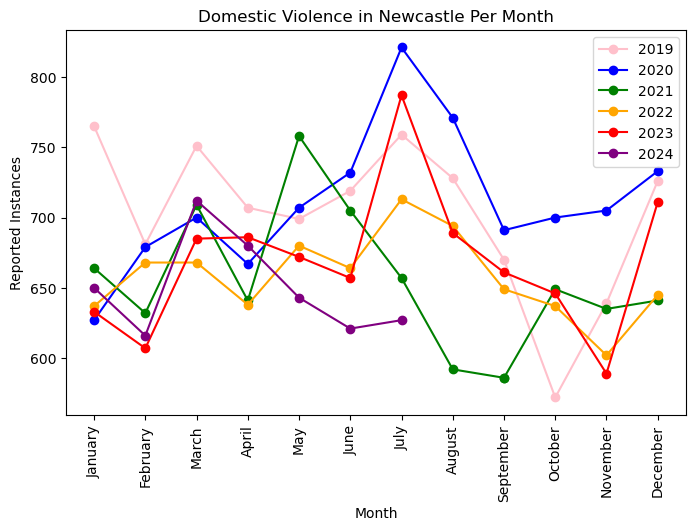

In [15]:
#plotting domestic violence in Newcastle per month by year on graph
plt.figure(figsize=(8, 5))
plt.plot(dv_premier_combined_df_2019['Month'], dv_premier_combined_df_2019['ReportedInstances'], marker='o', color='pink', label='2019')
plt.plot(dv_premier_combined_df_2020['Month'], dv_premier_combined_df_2020['ReportedInstances'], marker='o', color='blue', label='2020')
plt.plot(dv_premier_combined_df_2021['Month'], dv_premier_combined_df_2021['ReportedInstances'], marker='o', color='green', label='2021')
plt.plot(dv_premier_combined_df_2022['Month'], dv_premier_combined_df_2022['ReportedInstances'], marker='o', color='orange',label='2022')
plt.plot(dv_premier_combined_df_2023['Month'], dv_premier_combined_df_2023['ReportedInstances'], marker='o', color='red', label='2023')
plt.plot(dv_premier_combined_df_2024['Month'], dv_premier_combined_df_2024['ReportedInstances'], marker='o', color='purple', label='2024')

#adding titles and labels
plt.title('Domestic Violence in Newcastle Per Month')
plt.xlabel('Month')
plt.ylabel('Reported Instances')
plt.xticks(rotation=90)
plt.legend()

#displaying the plot
plt.show()

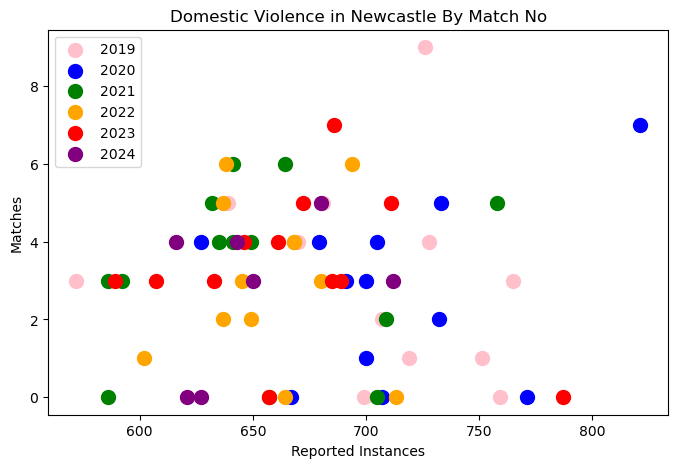

In [16]:
#plotting number of domestic violence instances in Newcastle by amounts of matches
plt.figure(figsize=(8, 5))
plt.scatter(dv_premier_combined_df_2019['ReportedInstances'], dv_premier_combined_df_2019['NoOfMatches'], marker='o', color='pink', s=100, label='2019')
plt.scatter(dv_premier_combined_df_2020['ReportedInstances'], dv_premier_combined_df_2020['NoOfMatches'], marker='o', color='blue', s=100, label='2020')
plt.scatter(dv_premier_combined_df_2021['ReportedInstances'], dv_premier_combined_df_2021['NoOfMatches'], marker='o', color='green', s=100, label='2021')
plt.scatter(dv_premier_combined_df_2022['ReportedInstances'], dv_premier_combined_df_2022['NoOfMatches'], marker='o', color='orange', s=100, label='2022')
plt.scatter(dv_premier_combined_df_2023['ReportedInstances'], dv_premier_combined_df_2023['NoOfMatches'], marker='o', color='red', s=100, label='2023')
plt.scatter(dv_premier_combined_df_2024['ReportedInstances'], dv_premier_combined_df_2024['NoOfMatches'], marker='o', color='purple', s=100, label='2024')

#adding title and labels
plt.title('Domestic Violence in Newcastle By Match No')
plt.xlabel('Reported Instances')
plt.ylabel('Matches')
plt.legend()

#displaying the plot
plt.show()

In [17]:
#checking dataframe types
print(dv_premier_combined_sorted_df.dtypes)
print(dv_premier_combined_sorted_df.head())

Year                    int64
Month                category
NoOfMatches             int64
ReportedInstances       int64
dtype: object
    Year     Month  NoOfMatches  ReportedInstances
4   2019   January            3                765
3   2019  February            5                681
6   2019     March            1                751
0   2019     April            2                707
54  2019       May            0                699


In [18]:
#dropping NA from premier league combined dataframe
dv_premier_combined_sorted_df.replace(0,np.nan,inplace=True)
dv_premier_combined_sorted_df.dropna()

,Year,Month,NoOfMatches,ReportedInstances
4,2019,January,3.0,765
3,2019,February,5.0,681
6,2019,March,1.0,751
0,2019,April,2.0,707
5,2019,June,1.0,719
1,2019,August,4.0,728
9,2019,September,4.0,670
8,2019,October,3.0,572
7,2019,November,5.0,639
2,2019,December,9.0,726


In [19]:
#sorting months and then sorting dataframe into months

#mapping the months
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dv_premier_combined_sorted_df['Month_Num'] = dv_premier_combined_sorted_df['Month'].map(month_map)

#converting month_num to Numeric data type and then dropping original month column
dv_premier_combined_sorted_df['Month_Num'] = pd.to_numeric(dv_premier_combined_sorted_df['Month_Num'])
dv_premier_combined_sorted_df = dv_premier_combined_sorted_df.drop(columns=['Month'])

In [20]:
#finding Pearson correlation coefficient
corr_coeff = dv_premier_combined_sorted_df.corr().loc['ReportedInstances', 'NoOfMatches']
print(f'Pearson correlation coefficient: {corr_coeff:.2f}')

Pearson correlation coefficient: 0.15


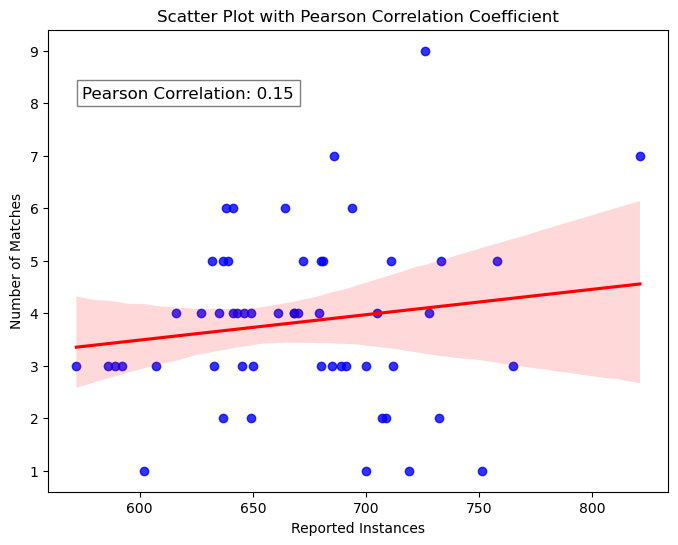

In [21]:
#plotting Pearson correlation coefficient in a scatter plot using Seaborn library
plt.figure(figsize=(8,6))
sns.regplot(data=dv_premier_combined_sorted_df, x='ReportedInstances', y='NoOfMatches', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

#annotating the Pearson correlation coefficient
plt.text(
    x=dv_premier_combined_sorted_df['ReportedInstances'].max() * 0.7, 
    y=dv_premier_combined_sorted_df['NoOfMatches'].max() * 0.9, 
    s=f'Pearson Correlation: {corr_coeff:.2f}', 
    fontsize=12, 
    bbox=dict(facecolor='white', alpha=0.5)
)

#adding labels and titles
plt.xlabel("Reported Instances")
plt.ylabel("Number of Matches")
plt.title("Scatter Plot with Pearson Correlation Coefficient")

#displaying the plot
plt.show()

In [22]:
#filtering police dataframe to Sunderland
fb_championship_df_filtered = fb_championship_df_cleaned[(fb_championship_df_cleaned['HomeTeam'] == "Sunderland AFC") | (fb_championship_df_cleaned['AwayTeam'] == "Sunderland AFC")].reset_index()
fb_championship_df_filtered.head()

,index,Season,DateofMatch,HomeTeam,AwayTeam,HomeTeamScore,AwayTeamScore,Winner,Location,Derby
0,257,2022/2023,15/04/2023,Sunderland AFC,Birmingham City,2,1,Sunderland AFC,Sunderland,False
1,258,2023/2024,11/11/2023,Sunderland AFC,Birmingham City,3,1,Sunderland AFC,Sunderland,False
2,396,2022/2023,26/12/2022,Sunderland AFC,Blackburn Rovers,2,1,Sunderland AFC,Sunderland,False
3,397,2023/2024,01/04/2024,Sunderland AFC,Blackburn Rovers,1,5,Blackburn Rovers,Sunderland,False
4,455,2022/2023,04/10/2022,Sunderland AFC,Blackpool FC,0,0,Draw,Sunderland,False


In [23]:
#transforming Date of Match to correct format and grouping by Year, Month
fb_championship_df_filtered['DateofMatch'].astype(str)
fb_championship_df_filtered['DateofMatch'] = pd.to_datetime(fb_championship_df_filtered['DateofMatch'], format='%d/%m/%Y')
fb_championship_df_filtered['MonthNumber'] = fb_championship_df_filtered['DateofMatch'].dt.month
fb_championship_df_filtered['Year'] = fb_championship_df_filtered['DateofMatch'].dt.year
fb_championship_df_filtered['Month'] = fb_championship_df_filtered['DateofMatch'].dt.month_name()
fb_championship_df_filtered = fb_championship_df_filtered.groupby(['Year','Month']).size().reset_index(name='NoOfMatches')

#filling empty datapoints with 0s
zero_matches = [
    {"Year": 2022, "Month": "January", "NoOfMatches": 0},
    {"Year": 2022, "Month": "February", "NoOfMatches": 0},
    {"Year": 2022, "Month": "March", "NoOfMatches": 0},
    {"Year": 2022, "Month": "April", "NoOfMatches": 0},
    {"Year": 2022, "Month": "May", "NoOfMatches": 0},
    {"Year": 2022, "Month": "June", "NoOfMatches": 0},
    {"Year": 2022, "Month": "July", "NoOfMatches": 0},
    {"Year": 2023, "Month": "June", "NoOfMatches": 0},
    {"Year": 2023, "Month": "July", "NoOfMatches": 0},
    {"Year": 2024, "Month": "June", "NoOfMatches": 0},
    {"Year": 2024, "Month": "July", "NoOfMatches": 0},
]

#concatenating zero data points into main dataframe
zero_matches_df_champ = pd.DataFrame(zero_matches)
fb_championship_df_filtered = pd.concat([fb_championship_df_filtered, zero_matches_df_champ], ignore_index=True)

In [24]:
#filtering by location
dv_police_df_filtered_sunderland = dv_police_df_cleaned[(dv_police_df_cleaned["Location"] == "Sunderland")].reset_index()
dv_police_df_filtered_sunderland_group_by_month = dv_police_df_filtered_sunderland.groupby(['Year', 'Month'])['ReportedInstances'].sum().reset_index()

In [25]:
#merging dataframes - sunderland domestic violence by month and championship
dv_championship_combined_df = pd.merge(fb_championship_df_filtered, dv_police_df_filtered_sunderland_group_by_month, on=['Year', 'Month'], how="inner")

#ordering by month column
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

#sorting dataframe by year and month
dv_championship_combined_df['Month'] = pd.Categorical(dv_championship_combined_df['Month'], categories=month_order, ordered=True)
dv_championship_combined_sorted_df = dv_championship_combined_df.sort_values(by=['Year','Month'])
dv_championship_combined_sorted_df.head(80)

,Year,Month,NoOfMatches,ReportedInstances
21,2022,January,0,613
22,2022,February,0,643
23,2022,March,0,631
24,2022,April,0,595
25,2022,May,0,662
26,2022,June,0,691
2,2022,July,1,696
27,2022,July,0,696
0,2022,August,6,713
5,2022,September,3,655


In [26]:
#filtering data by year 2022 to 2024 (years Sunderland were in Championship)
dv_championship_combined_df_2022 = dv_championship_combined_sorted_df[dv_championship_combined_sorted_df['Year'] == 2022]
dv_championship_combined_df_2023 = dv_championship_combined_sorted_df[dv_championship_combined_sorted_df['Year'] == 2023]
dv_championship_combined_df_2024 = dv_championship_combined_sorted_df[dv_championship_combined_sorted_df['Year'] == 2024]

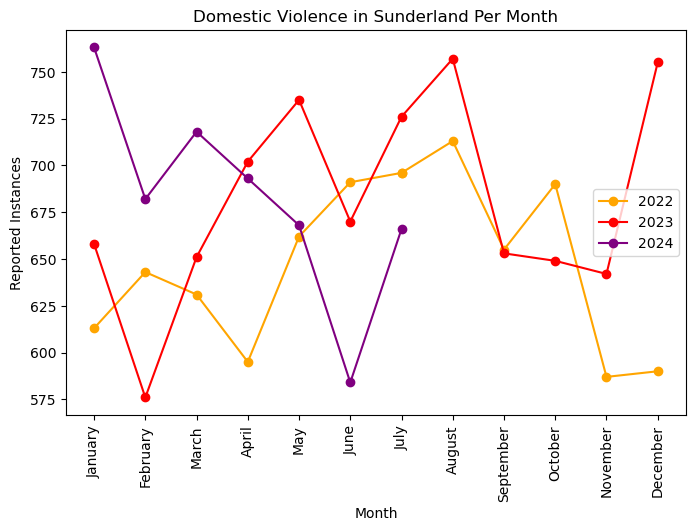

In [27]:
#plotting data in graph for dataframe
plt.figure(figsize=(8, 5))
plt.plot(dv_championship_combined_df_2022['Month'], dv_championship_combined_df_2022['ReportedInstances'], marker='o', color='orange',label='2022')
plt.plot(dv_championship_combined_df_2023['Month'], dv_championship_combined_df_2023['ReportedInstances'], marker='o', color='red', label='2023')
plt.plot(dv_championship_combined_df_2024['Month'], dv_championship_combined_df_2024['ReportedInstances'], marker='o', color='purple', label='2024')

#adding titles and labels
plt.title('Domestic Violence in Sunderland Per Month')
plt.xlabel('Month')
plt.ylabel('Reported Instances')
plt.xticks(rotation=90)
plt.legend()

#displaying the plot
plt.show()

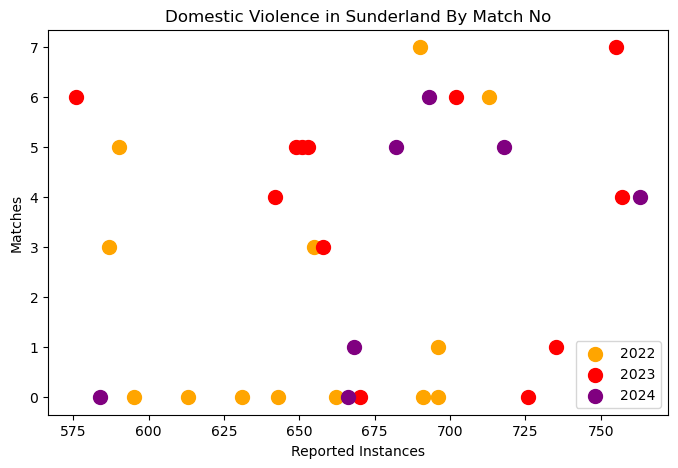

In [28]:
#plotting data in a scatter graph for dataframe
plt.figure(figsize=(8, 5))
plt.scatter(dv_championship_combined_df_2022['ReportedInstances'], dv_championship_combined_df_2022['NoOfMatches'], marker='o', color='orange', s=100, label='2022')
plt.scatter(dv_championship_combined_df_2023['ReportedInstances'], dv_championship_combined_df_2023['NoOfMatches'], marker='o', color='red', s=100, label='2023')
plt.scatter(dv_championship_combined_df_2024['ReportedInstances'], dv_championship_combined_df_2024['NoOfMatches'], marker='o', color='purple', s=100, label='2024')

#adding titles and labels
plt.title('Domestic Violence in Sunderland By Match No')
plt.xlabel('Reported Instances')
plt.ylabel('Matches')
plt.legend()

#displaying the plot
plt.show()

In [29]:
#checking datatype columns
print(dv_championship_combined_sorted_df.dtypes)
print(dv_championship_combined_sorted_df.head())

Year                    int64
Month                category
NoOfMatches             int64
ReportedInstances       int64
dtype: object
    Year     Month  NoOfMatches  ReportedInstances
21  2022   January            0                613
22  2022  February            0                643
23  2022     March            0                631
24  2022     April            0                595
25  2022       May            0                662


In [30]:
#replacing 0s with NaN
dv_championship_combined_sorted_df.replace(0,np.nan,inplace=True)
dv_championship_combined_sorted_df.dropna()

,Year,Month,NoOfMatches,ReportedInstances
2,2022,July,1.0,696
0,2022,August,6.0,713
5,2022,September,3.0,655
4,2022,October,7.0,690
3,2022,November,3.0,587
1,2022,December,5.0,590
10,2023,January,3.0,658
9,2023,February,6.0,576
11,2023,March,5.0,651
6,2023,April,6.0,702


In [31]:
#mapping the months
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

#mapping month names to number and converting to numeric
dv_championship_combined_sorted_df['Month_Num'] = dv_championship_combined_sorted_df['Month'].map(month_map)
dv_championship_combined_sorted_df['Month_Num'] = pd.to_numeric(dv_championship_combined_sorted_df['Month_Num'])

#dropping month column
dv_championship_combined_sorted_df = dv_championship_combined_sorted_df.drop(columns=['Month'])

In [32]:
#calculating pearson correlation coefficent
corr_coeff_sun = dv_championship_combined_sorted_df.corr().loc['ReportedInstances', 'NoOfMatches']
print(f'Pearson correlation coefficient: {corr_coeff_sun:.2f}')

Pearson correlation coefficient: 0.01


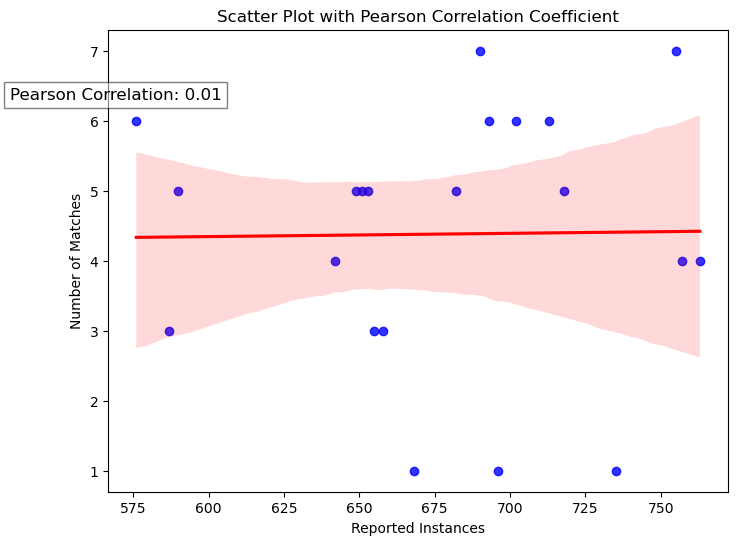

In [33]:
#creating scatter plot
plt.figure(figsize=(8,6))
sns.regplot(data=dv_championship_combined_sorted_df, x='ReportedInstances', y='NoOfMatches', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

#annotate the Pearson correlation coefficient
plt.text(
    x=dv_championship_combined_sorted_df['ReportedInstances'].max() * 0.7, 
    y=dv_championship_combined_sorted_df['NoOfMatches'].max() * 0.9, 
    s=f'Pearson Correlation: {corr_coeff_sun:.2f}', 
    fontsize=12, 
    bbox=dict(facecolor='white', alpha=0.5)
)
    
#adding labels and title
plt.xlabel("Reported Instances")
plt.ylabel("Number of Matches")
plt.title("Scatter Plot with Pearson Correlation Coefficient")

#displaying the plot
plt.show()

In [34]:
#add a new column 'Location' to the dv_championship_combined_sorted_df DataFrame and set the value to 'Sunderland'
dv_championship_combined_sorted_df["Location"] = "Sunderland"

#add a new column 'Location' to the dv_premier_combined_sorted_df DataFrame and set the value to 'Newcastle'
dv_premier_combined_sorted_df["Location"] = "Newcastle"

In [35]:
#combine the dv_championship_combined_sorted_df (Sunderland) and dv_premier_combined_sorted_df (Newcastle) DataFrames vertically.
#the 'ignore_index=True' ensures that the index is reset after concatenation, so it's continuous across the new combined DataFrame.
newcastle_sunderland_combined_df = pd.concat([dv_championship_combined_sorted_df, dv_premier_combined_sorted_df], ignore_index=True)

#display the first 50 rows of the newly combined DataFrame to inspect the result
newcastle_sunderland_combined_df.head(50)

,Year,NoOfMatches,ReportedInstances,Month_Num,Location
0,2022,NaN,613,1,Sunderland
1,2022,NaN,643,2,Sunderland
2,2022,NaN,631,3,Sunderland
3,2022,NaN,595,4,Sunderland
4,2022,NaN,662,5,Sunderland
5,2022,NaN,691,6,Sunderland
6,2022,1.0,696,7,Sunderland
7,2022,NaN,696,7,Sunderland
8,2022,6.0,713,8,Sunderland
9,2022,3.0,655,9,Sunderland


In [36]:
#select all columns in the newcastle_sunderland_combined_df DataFrame that have the data type 'object' (categorical columns)
categorical_cols = newcastle_sunderland_combined_df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Location'], dtype='object')


In [37]:
#converting categorical columns to dummy/indicator variables using pd.get_dummies.
newcastle_sunderland_combined_df_encoded = pd.get_dummies(newcastle_sunderland_combined_df, columns=categorical_cols)

#dropping any rows with missing values (NaN) in the encoded DataFrame
newcastle_sunderland_combined_df_encoded.dropna(inplace=True)

newcastle_sunderland_combined_df_encoded.head()

,Year,NoOfMatches,ReportedInstances,Month_Num,Location_Newcastle,Location_Sunderland
6,2022,1.0,696,7,False,True
8,2022,6.0,713,8,False,True
9,2022,3.0,655,9,False,True
10,2022,7.0,690,10,False,True
11,2022,3.0,587,11,False,True


In [38]:
#selecting the feature columns for the model (X)
X = newcastle_sunderland_combined_df_encoded[["Year", "Month_Num", "NoOfMatches", "Location_Sunderland", "Location_Newcastle"]].values

#selecting the target variable (y). 
y = newcastle_sunderland_combined_df_encoded['ReportedInstances'].values

#splitting the data into training and testing sets. 
X_MLP_train, X_MLP_test, y_MLP_train, y_MLP_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#initialising a StandardScaler object to scale (normalize) the feature data (X)and target variable (y).
scaler_X_MLP = StandardScaler()
scaler_y_MLP = StandardScaler()

#fitting the scaler onto each bit of data
X_train_MLP_scaled = scaler_X_MLP.fit_transform(X_MLP_train)
X_test_MLP_scaled = scaler_X_MLP.transform(X_MLP_test)

#reshaping the data for training
y_train_MLP_scaled = scaler_y_MLP.fit_transform(y_MLP_train.reshape(-1, 1))
y_test_MLP_scaled = scaler_y_MLP.transform(y_MLP_test.reshape(-1, 1))

#converting the test data to a 32-bit floating point format to ensure data type matches expected input format
X_MLP_test = X_MLP_test.astype(np.float32)

In [40]:
#defining MLP model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_MLP_scaled.shape[1],)),
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_MLP_scaled.shape[1],)),  # More neurons
    keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),  # Prevent overfitting
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # Output single value
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)

#compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='huber', metrics=['mae'])

#training model
history_MLP = model.fit(X_train_MLP_scaled, y_train_MLP_scaled, epochs=500, batch_size=16, validation_data=(X_test_MLP_scaled, y_test_MLP_scaled), callbacks=[early_stopping])

y_pred = model.predict(X_test_MLP_scaled)
y_pred_original = scaler_y_MLP.inverse_transform(y_pred.reshape(-1, 1))

Epoch 1/500


C:\Users\Beef\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 3.6477 - mae: 1.5520 - val_loss: 3.2255 - val_mae: 1.0863
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5552 - mae: 1.4472 - val_loss: 3.2300 - val_mae: 1.0929
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5666 - mae: 1.4348 - val_loss: 3.2347 - val_mae: 1.0997
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.5002 - mae: 1.3811 - val_loss: 3.2363 - val_mae: 1.1031
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5736 - mae: 1.4536 - val_loss: 3.2359 - val_mae: 1.1031
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4327 - mae: 1.2912 - val_loss: 3.2344 - val_mae: 1.1025
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5414 - mae: 1.4285 - val_loss: 3.2315 - val_mae: 1.1002
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.4858 - mae: 1.3612 - val_loss: 3.2295 - val_mae: 1.0986
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.4298 - mae: 1.3009 - val

In [41]:
#inverse transforming the scaled test data back to original values
y_test_original = scaler_y_MLP.inverse_transform(y_test_MLP_scaled)

#inverse transform the scaled predictions back to original values
y_pred_original = scaler_y_MLP.inverse_transform(y_pred.reshape(-1, 1))

In [42]:
#checking y_pred_original is correct
print("Predicted Reported Instances:", y_pred_original[:5].flatten())

Predicted Reported Instances: [678.1142  683.2257  677.36206 676.40314 678.315  ]


In [43]:
#calculating the Mean Absolute Error (MAE) between the original test values (y_test_original) and printing
mae_original = mean_absolute_error(y_test_original, y_pred_original)
print(f"Mean Absolute Error: {mae_original:.2f}")

Mean Absolute Error: 49.33


In [44]:
#printing the minimum and maximum values of the actual target values (y_CNN_test) in the test set
print("Actual y range:", y_test_original.min(), "to", y_test_original.max())

#calculating and printing the Mean Absolute Error (MAE) as a percentage of the range of actual target values
print("MAE as % of y range:", (51.68 / (y_test_original.max() - y_test_original.min())) * 100, "%")

Actual y range: 572.0 to 821.0
MAE as % of y range: 20.755020080321284 %


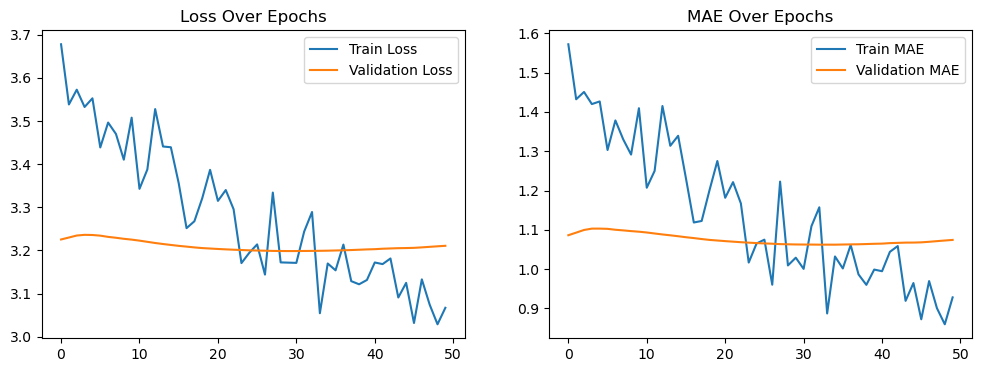

In [45]:
#plotting loss & MAE curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_MLP.history['loss'], label='Train Loss')
plt.plot(history_MLP.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_MLP.history['mae'], label='Train MAE')
plt.plot(history_MLP.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title("MAE Over Epochs")

plt.show()

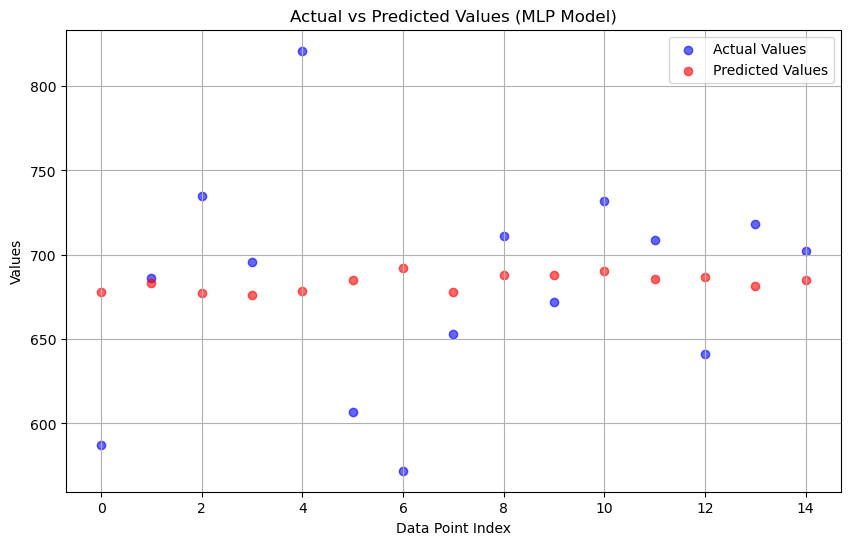

In [46]:
#creating an index for each data point (to keep x-axis simple)
indices = np.arange(len(y_test_original))

#scatter plot for actual values
plt.figure(figsize=(10, 6))
plt.scatter(indices, y_test_original, color='blue', alpha=0.6, label='Actual Values')

#scatter plot for predicted values
plt.scatter(indices, y_pred_original, color='red', alpha=0.6, label='Predicted Values')

#labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values (MLP Model)')
plt.legend()
plt.grid(True)

#showing plot
plt.show()

In [47]:
#initialising the StandardScaler to scale the input features for the CNN model
scaler_x_CNN = StandardScaler()

#reshaping the input data (X) to ensure it's 2D for scaling and applying scaling to the input features (X) and store the scaled data
X = X.reshape(X.shape[0], -1)
X_scaled = scaler_x_CNN.fit_transform(X)

#reshaping the scaled input data into a 3D format (samples, features, 1) for CNN input
X_reshaped_CNN = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

#initialising the StandardScaler to scale the target values for the CNN model
scaler_y_CNN = StandardScaler()

#applying scaling to the target values (y) and flatten the result to make it 1D
y_scaled_CNN = scaler_y_CNN.fit_transform(y.reshape(-1, 1)).flatten()

#splitting the data into training and testing sets (80% train, 20% test) for both features and target values
x_CNN_train, x_CNN_test, y_CNN_train, y_CNN_test = train_test_split(X_reshaped_CNN, y_scaled_CNN, test_size=0.2, random_state=42)

In [48]:
#defining the 1D CNN model
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_reshaped_CNN.shape[1], 1)),
    layers.MaxPooling1D(pool_size=1),  # Reduce pooling
    layers.Conv1D(64, kernel_size=1, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')
])

#compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#training the model
history_CNN = model.fit(x_CNN_train, y_CNN_train, epochs=200, validation_data=(x_CNN_test, y_CNN_test))

Epoch 1/200


C:\Users\Beef\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 0.9218 - mae: 0.7823 - val_loss: 1.4560 - val_mae: 0.9615
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7819 - mae: 0.6842 - val_loss: 1.4276 - val_mae: 0.9534
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8298 - mae: 0.7350 - val_loss: 1.4059 - val_mae: 0.9472
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.7806 - mae: 0.7025 - val_loss: 1.3898 - val_mae: 0.9420
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7189 - mae: 0.6551 - val_loss: 1.3772 - val_mae: 0.9395
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7032 - mae: 0.6574 - val_loss: 1.3682 - val_mae: 0.9390
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6840 - mae: 0.6410 - val_loss: 1.3536 - val_mae: 0.9341
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7760 - mae: 0.6827 - val_loss: 1.3373 - val_mae: 0.9285
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6908 - mae: 0.6616 - va

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5506 - mae: 0.5807 - val_loss: 1.1852 - val_mae: 0.8652
Epoch 56/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6281 - mae: 0.6273 - val_loss: 1.1850 - val_mae: 0.8685
Epoch 57/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4885 - mae: 0.5547 - val_loss: 1.1862 - val_mae: 0.8725
Epoch 58/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5270 - mae: 0.5676 - val_loss: 1.1886 - val_mae: 0.8764
Epoch 59/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4952 - mae: 0.5589 - val_loss: 1.1923 - val_mae: 0.8791
Epoch 60/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5445 - mae: 0.5675 - val_loss: 1.1926 - val_mae: 0.8796
Epoch 61/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5420 - mae: 0.5798 - val_loss: 1.1899 - val_mae: 0.8787
Epoch 62/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5910 - mae: 0.6082 - val_loss: 1.1918 - val_mae: 0.8809
Epoch 63/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5021 - mae: 0.53

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3896 - mae: 0.4852 - val_loss: 1.2510 - val_mae: 0.9314
Epoch 110/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4257 - mae: 0.5132 - val_loss: 1.2346 - val_mae: 0.9251
Epoch 111/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4817 - mae: 0.5986 - val_loss: 1.2341 - val_mae: 0.9254
Epoch 112/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4401 - mae: 0.5332 - val_loss: 1.2322 - val_mae: 0.9257
Epoch 113/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4140 - mae: 0.5465 - val_loss: 1.2339 - val_mae: 0.9277
Epoch 114/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4192 - mae: 0.5184 - val_loss: 1.2448 - val_mae: 0.9335
Epoch 115/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4122 - mae: 0.5243 - val_loss: 1.2606 - val_mae: 0.9411
Epoch 116/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4581 - mae: 0.5694 - val_loss: 1.2729 - val_mae: 0.9462
Epoch 117/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4043 - m

Epoch 163/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3568 - mae: 0.4659 - val_loss: 1.4155 - val_mae: 1.0086
Epoch 164/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4470 - mae: 0.5079 - val_loss: 1.4161 - val_mae: 1.0091
Epoch 165/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4405 - mae: 0.5361 - val_loss: 1.4166 - val_mae: 1.0064
Epoch 166/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3645 - mae: 0.4734 - val_loss: 1.4113 - val_mae: 1.0016
Epoch 167/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3771 - mae: 0.4855 - val_loss: 1.3933 - val_mae: 0.9915
Epoch 168/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3518 - mae: 0.4599 - val_loss: 1.3674 - val_mae: 0.9796
Epoch 169/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3647 - mae: 0.4813 - val_loss: 1.3572 - val_mae: 0.9762
Epoch 170/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3405 - mae: 0.4842 - val_loss: 1.3587 - val_mae: 0.9783
Epoch 171/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - lo

In [49]:
#using the trained CNN model to make predictions on the test set (x_CNN_test) and then inversing/transforming the scaled predictions
y_pred_CNN = model.predict(x_CNN_test)
y_pred_CNN = scaler_y_CNN.inverse_transform(y_pred_CNN.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [50]:
#evaluating the model's performance on the test set (x_CNN_test, y_CNN_test) and finding the MAE
test_loss, test_mae = model.evaluate(x_CNN_test, y_CNN_test, verbose=2)
print(f'\n Mean Absolute Error: {test_mae:.4f}')

1/1 - 0s - 32ms/step - loss: 1.4055 - mae: 0.9986

 Mean Absolute Error: 0.9986


In [51]:
#printing the minimum and maximum values of the actual target values (y_CNN_test) in the test set
print("Actual y range:", y_CNN_test.min(), "to", y_CNN_test.max())

#calculating and printing the Mean Absolute Error (MAE) as a percentage of the range of actual target values
print("MAE as % of y range:", (0.2929 / (y_CNN_test.max() - y_CNN_test.min())) * 100, "%")

Actual y range: -2.016547491518911 to 2.9490411693613185
MAE as % of y range: 5.898595715499295 %


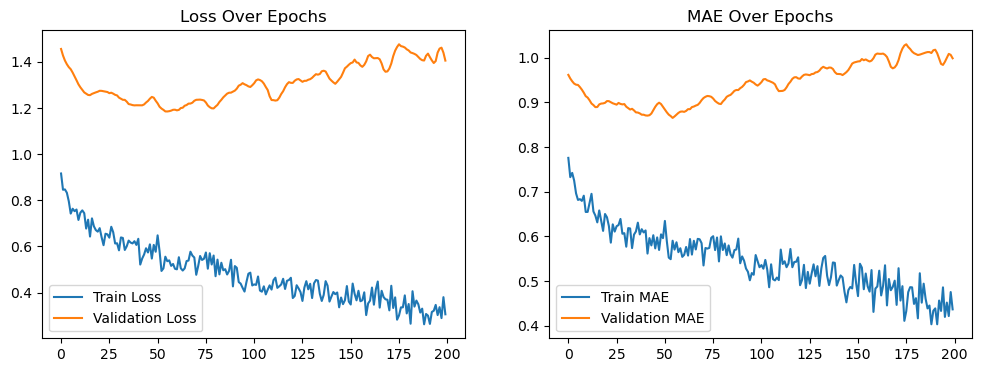

In [52]:
#plotting loss & MAE curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['loss'], label='Train Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['mae'], label='Train MAE')
plt.plot(history_CNN.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title("MAE Over Epochs")

plt.show()

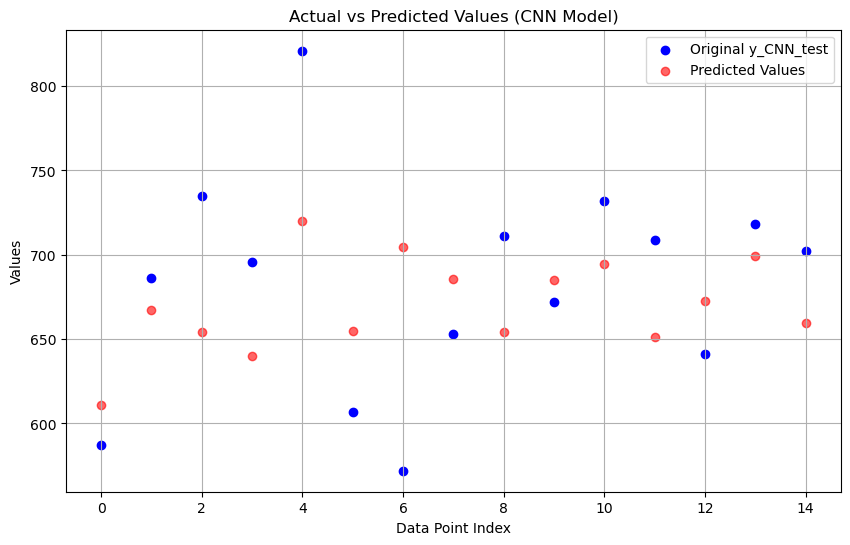

In [53]:
#reverting y values back to actuals
y_CNN_test_original = scaler_y_CNN.inverse_transform(y_CNN_test.reshape(-1, 1))

#creating an index for each data point (to keep x-axis simple)
indices = np.arange(len(y_CNN_test))

#scatter plot for actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_CNN_test_original)), y_CNN_test_original, color='blue', label='Original y_CNN_test')

#scatter plot for predicted values
plt.scatter(indices, y_pred_CNN, color='red', alpha=0.6, label='Predicted Values')

#labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values (CNN Model)')
plt.legend()
plt.grid(True)

#showing plot
plt.show()

In [54]:
#initialiing MinMaxScaler to scale the input features and target values to a range of [0, 1] for the RNN model
scaler_X_RNN = MinMaxScaler(feature_range=(0, 1))
scaler_y_RNN = MinMaxScaler(feature_range=(0, 1))

#applying scaling to the input data X
X_scaled_RNN = scaler_X_RNN.fit_transform(X)

#getting the number of samples and the number of features from the scaled input data
num_samples = X.shape[0]  
num_features = X_scaled_RNN.shape[1]
seq_length = 1

#checking if the number of samples can be evenly divided by the sequence length
if num_samples % seq_length == 0:
    #reshaping the input data (X_scaled_RNN) into 3D shape for the RNN (samples, time steps, features)
    num_samples = num_samples // seq_length
    X_reshaped_RNN = X_scaled_RNN.reshape((num_samples, seq_length, num_features))
else:
    #raising an error if the data cannot be reshaped evenly according to the sequence length
    raise ValueError(f"Cannot reshape array of size {X_scaled_RNN.size} into ({num_samples}, {seq_length}, {num_features}). Adjust seq_length.")

#scaling the target values (y) and flatten the result to make it 1D 
y_scaled_RNN = scaler_y_RNN.fit_transform(y.reshape(-1, 1)).flatten()

#splitting the dataset into training and test sets, using 80% of data for training
train_size = int(0.8 * num_samples)
X_RNN_train, X_RNN_test, y_RNN_train, y_RNN_test = train_test_split(
    X_reshaped_RNN, y_scaled_RNN, 
    test_size=0.2, 
    random_state=42, 
)

In [55]:
#defining the RNN model
model = keras.Sequential([
    layers.SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(seq_length, num_features)),
    layers.Dropout(0.2),
    layers.SimpleRNN(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

#compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

#training the model
history_RNN = model.fit(X_RNN_train, y_RNN_train, epochs=50, batch_size=8, validation_data=(X_RNN_test, y_RNN_test))

Epoch 1/50


C:\Users\Beef\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1431 - mae: 0.3199 - val_loss: 0.1114 - val_mae: 0.2724
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0701 - mae: 0.2063 - val_loss: 0.0718 - val_mae: 0.2244
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0483 - mae: 0.1799 - val_loss: 0.0655 - val_mae: 0.2186
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0611 - mae: 0.2092 - val_loss: 0.0645 - val_mae: 0.2156
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0485 - mae: 0.1783 - val_loss: 0.0659 - val_mae: 0.2128
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0483 - mae: 0.1735 - val_loss: 0.0649 - val_mae: 0.2110
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0410 - mae: 0.1662 - val_loss: 0.0656 - val_mae: 0.2130
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0361 - mae: 0.1517 - val_loss: 0.0642 - val_mae: 0.2118
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0363 - mae: 0.1522 - val_loss: 0.0

In [56]:
#using the trained RNN model to make predictions on the test set (X_RNN_test)
y_pred_scaled_RNN = model.predict(X_RNN_test)

#evaluating the model's performance on the test set (x_CNN_test, y_CNN_test) and finding the MAE
test_loss, test_mae = model.evaluate(X_RNN_test, y_RNN_test, verbose=2)
print(f"\nMean Absolute Error: {test_mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 - 0s - 30ms/step - loss: 0.0617 - mae: 0.2124

Mean Absolute Error: 0.2124


In [57]:
#inverse transforming the scaled target values (y_RNN_test) and predicted values (y_pred_scaled_RNN) back to the original scale
y_RNN_test_original = scaler_y_RNN.inverse_transform(y_RNN_test.reshape(-1, 1))
y_pred_RNN_original = scaler_y_RNN.inverse_transform(y_pred_scaled_RNN.reshape(-1, 1))

In [58]:
#printing the minimum and maximum values of the actual target values (y_CNN_test) in the test set
print("Actual y range:", y_RNN_test_original.min(), "to", y_RNN_test_original.max())

#calculating and printing the Mean Absolute Error (MAE) as a percentage of the range of actual target values
print("MAE as % of y range:", (0.2235 / (y_RNN_test_original.max() - y_RNN_test_original.min())) * 100, "%")

Actual y range: 572.0 to 821.0
MAE as % of y range: 0.08975903614457831 %


In [59]:
#inverse transform the scaled predicted values (y_pred_scaled_RNN) back to their original scale and reshaping to 2d
y_pred_RNN = scaler_y_RNN.inverse_transform(y_pred_scaled_RNN.reshape(-1, 1))

#inverse transform the scaled actual target values (y_RNN_test) back to their original scale
y_actual_RNN = scaler_y_RNN.inverse_transform(y_RNN_test.reshape(-1, 1))

#printing the first 5 actual and predicted values, formatted to 4 decimal places for comparison
for i in range(5):
    print(f"Actual: {y_actual_RNN[i][0]:.4f}, Predicted: {y_pred_RNN[i][0]:.4f}")

Actual: 587.0000, Predicted: 645.5184
Actual: 686.0000, Predicted: 657.3439
Actual: 735.0000, Predicted: 668.2177
Actual: 696.0000, Predicted: 651.1423
Actual: 821.0000, Predicted: 685.5069


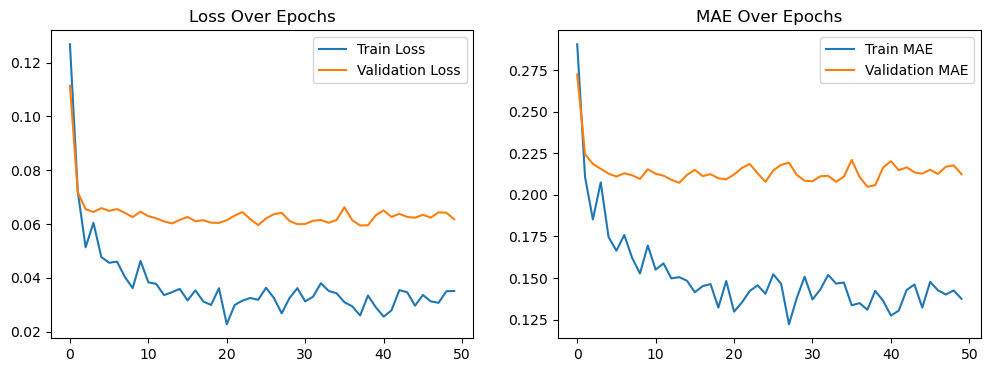

In [60]:
#plotting loss & MAE curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['loss'], label='Train Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['mae'], label='Train MAE')
plt.plot(history_RNN.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title("MAE Over Epochs")

plt.show()

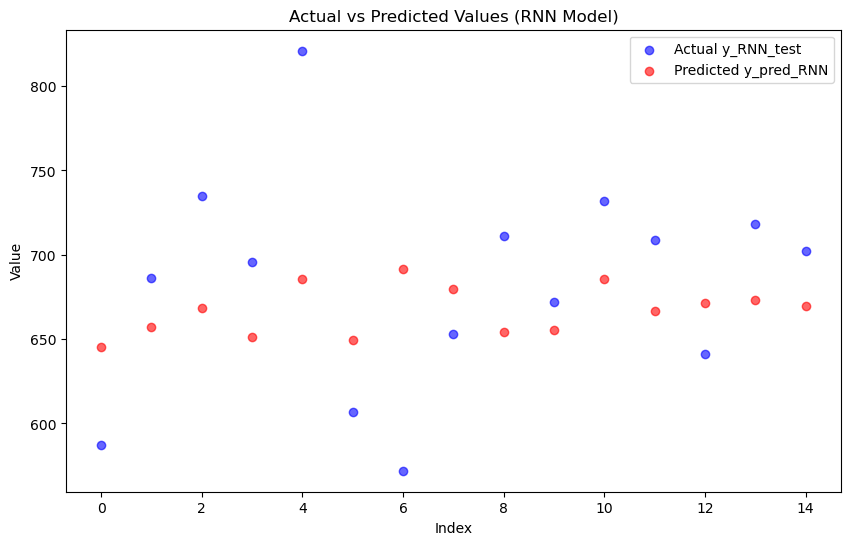

In [61]:
#plotting the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_RNN_test_original)), y_RNN_test_original, color='blue', label='Actual y_RNN_test', alpha=0.6)
plt.scatter(range(len(y_pred_RNN_original)), y_pred_RNN_original, color='red', label='Predicted y_pred_RNN', alpha=0.6)
plt.title("Actual vs Predicted Values (RNN Model)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()